In [2]:
#start of code
#importing packages 
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

In [3]:
def time_domain_output(f,H,t_start,t_end):
    t = np.linspace(t_start,t_end,10*(t_end-t_start))
    t2,y,svec=sp.lsim(H,f,t)
    return y
    

In [4]:
t_start = 0
t_end = 100
t = np.linspace(t_start,t_end,10*(t_end-t_start))
f1 = np.cos(1.5*t) * np.exp(-0.5*t)
#d2y + 2.25y = x
H=sp.lti([1],[1,0,2.25])

In [5]:
y1 = time_domain_output(f1,H,t_start,t_end)

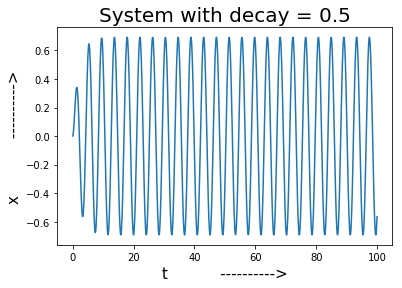

In [14]:
plt.plot(t,y1)
plt.xlabel(r"t           ---------->",size=15)
plt.ylabel(r"x            ---------->",size=15)
plt.title(r"System with decay = 0.5",size=20)
plt.show()

In [16]:
f2 = np.cos(1.5*t) * np.exp(-0.05*t)

In [17]:
y2 = time_domain_output(f2,H,t_start,t_end)

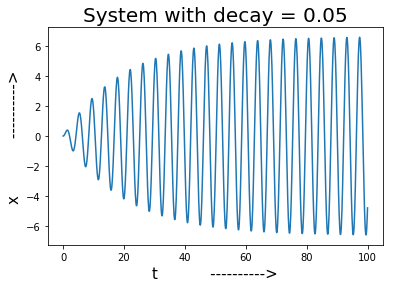

In [18]:
plt.plot(t,y2)
plt.xlabel(r"t           ---------->",size=15)
plt.ylabel(r"x            ---------->",size=15)
plt.title(r"System with decay = 0.05",size=20)
plt.show()

In [19]:
def input(freq,damp_fac):
    t = np.linspace(0,100,1000)
    return  np.cos(freq*t) * np.exp(-damp_fac*t)

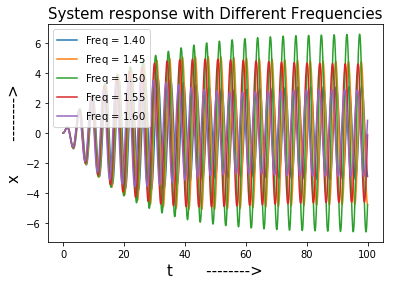

In [25]:
n=5
t = np.linspace(0,100,1000)
freq_range =np.linspace(1.4,1.6,n)
for freq in freq_range:
    plt.plot(t,time_domain_output(input(freq,0.05),H,0,100))
plt.xlabel("t       -------->",size=15)
plt.ylabel("x       -------->",size =15)
plt.title(r"System response with Different Frequencies",size=15)
plt.legend(["Freq = ${:.2f}$".format(f) for f in freq_range])
plt.show()

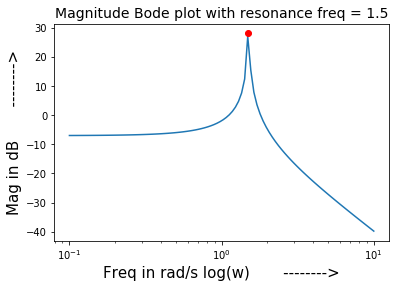

In [62]:
w,S,phi=H.bode()
plt.semilogx(w,S)
plt.plot(1.5,28,"ro")
plt.title(r"Magnitude Bode plot with resonance freq = 1.5",size=14)
plt.xlabel(r"Freq in rad/s log(w)       -------->",size=15)
plt.ylabel("Mag in dB       -------->",size =15)
plt.show()


In [11]:
#eqn1 -- dx2 + x-y = 0
#Eqn2 --dy2 + 2(y-x) = 0

In [52]:
#form eqn1 y = dx2 + x
#eq2 -- dx4+3dx2=0
xs = sp.lti([1,0,2],[1,0,3,0])
ys = sp.lti([2],[1,0,3,0])

In [53]:
t = np.linspace(0,20,200)

In [54]:
t1,x = sp.impulse(xs,None,t)
t2,y = sp.impulse(ys,None,t)

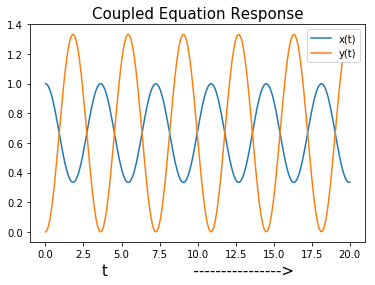

In [72]:
plt.plot(t1,x,label=r"x(t)")
plt.plot(t2,y,label=r"y(t)")
plt.legend()
plt.xlabel("t                  ---------------->",size=15)
plt.title("Coupled Equation Response",size=15)
plt.show()

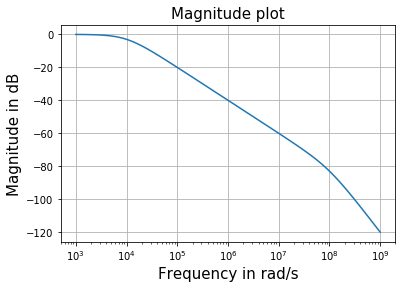

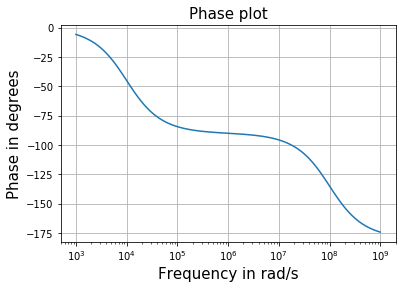

In [77]:
H_circ1 = sp.lti(np.poly1d([10**12]),np.poly1d([1,10**8,10**12]))
w1,S1,phi1=H_circ1.bode()
plt.semilogx(w1,S1)
plt.xlabel("Frequency in rad/s",size=15)
plt.ylabel("Magnitude in dB",size=15)
plt.title("Magnitude plot",size=15)
plt.grid(True)
plt.show()
plt.semilogx(w1,phi1)
plt.xlabel("Frequency in rad/s",size=15)
plt.ylabel("Phase in degrees",size=15)
plt.title("Phase plot",size=15)
plt.grid(True)
plt.show()

In [79]:
t_steady = np.linspace(0,10**-2,10**5)
in_steady = np.cos(10**3 * t_steady) - np.cos(10**6 * t_steady)

In [80]:
t1,y_steady,svec1=sp.lsim(H_circ1,in_steady,t_steady)

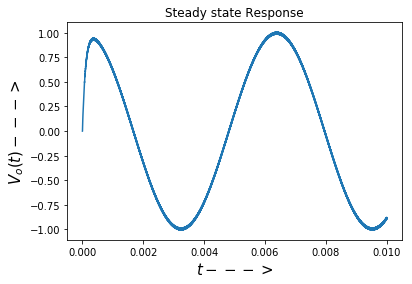

In [91]:
plt.plot(t1,y_steady)
plt.title("Steady state Response")
plt.ylabel(r"$V_{o}(t)   --->$",size=15)
plt.xlabel(r"$t  --->$",size=15)
plt.show()

In [93]:
t_trans = np.linspace(0,35*10**-6,30*10**2+1)
in_trans = np.cos(10**3 * t_trans) - np.cos(10**6 * t_trans)

In [94]:
t2,y_trans,svec2 = sp.lsim(H_circ1,in_trans,t_trans)

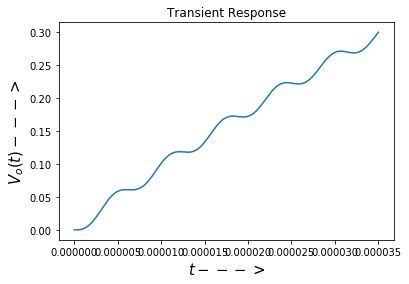

In [95]:
plt.plot(t2,y_trans)
plt.title("Transient Response")
plt.ylabel(r"$V_{o}(t)   --->$",size=15)
plt.xlabel(r"$t  --->$",size=15)
plt.show()